# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

- **CRIM**: Per capita crime rate by town  

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  

- **INDUS**: Proportion of non-retail business acres per town  

- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  

- **NOX**: Nitric oxides concentration (parts per 10 million)  

- **RM**: Average number of rooms per dwelling  

- **AGE**: Proportion of owner-occupied units built prior to 1940  

- **DIS**: Weighted distances to five Boston employment centres  

- **RAD**: Index of accessibility to radial highways  

- **TAX**: Full-value property-tax rate per $10,000  

- **PTRATIO**: Pupil-teacher ratio by town  

- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  

- **LSTAT**: Percentage of lower status of the population  

- **MEDV**: Median value of owner-occupied homes in $1000's  

# Load the Dataset

In [2]:
# Fetch the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Column names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for the features
df = pd.DataFrame(data, columns=feature_names)

# Add the target variable (MEDV) to the DataFrame
df["MEDV"] = target

# Display the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Handling Missing Values

In [3]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Checking missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Visualizing Key Features

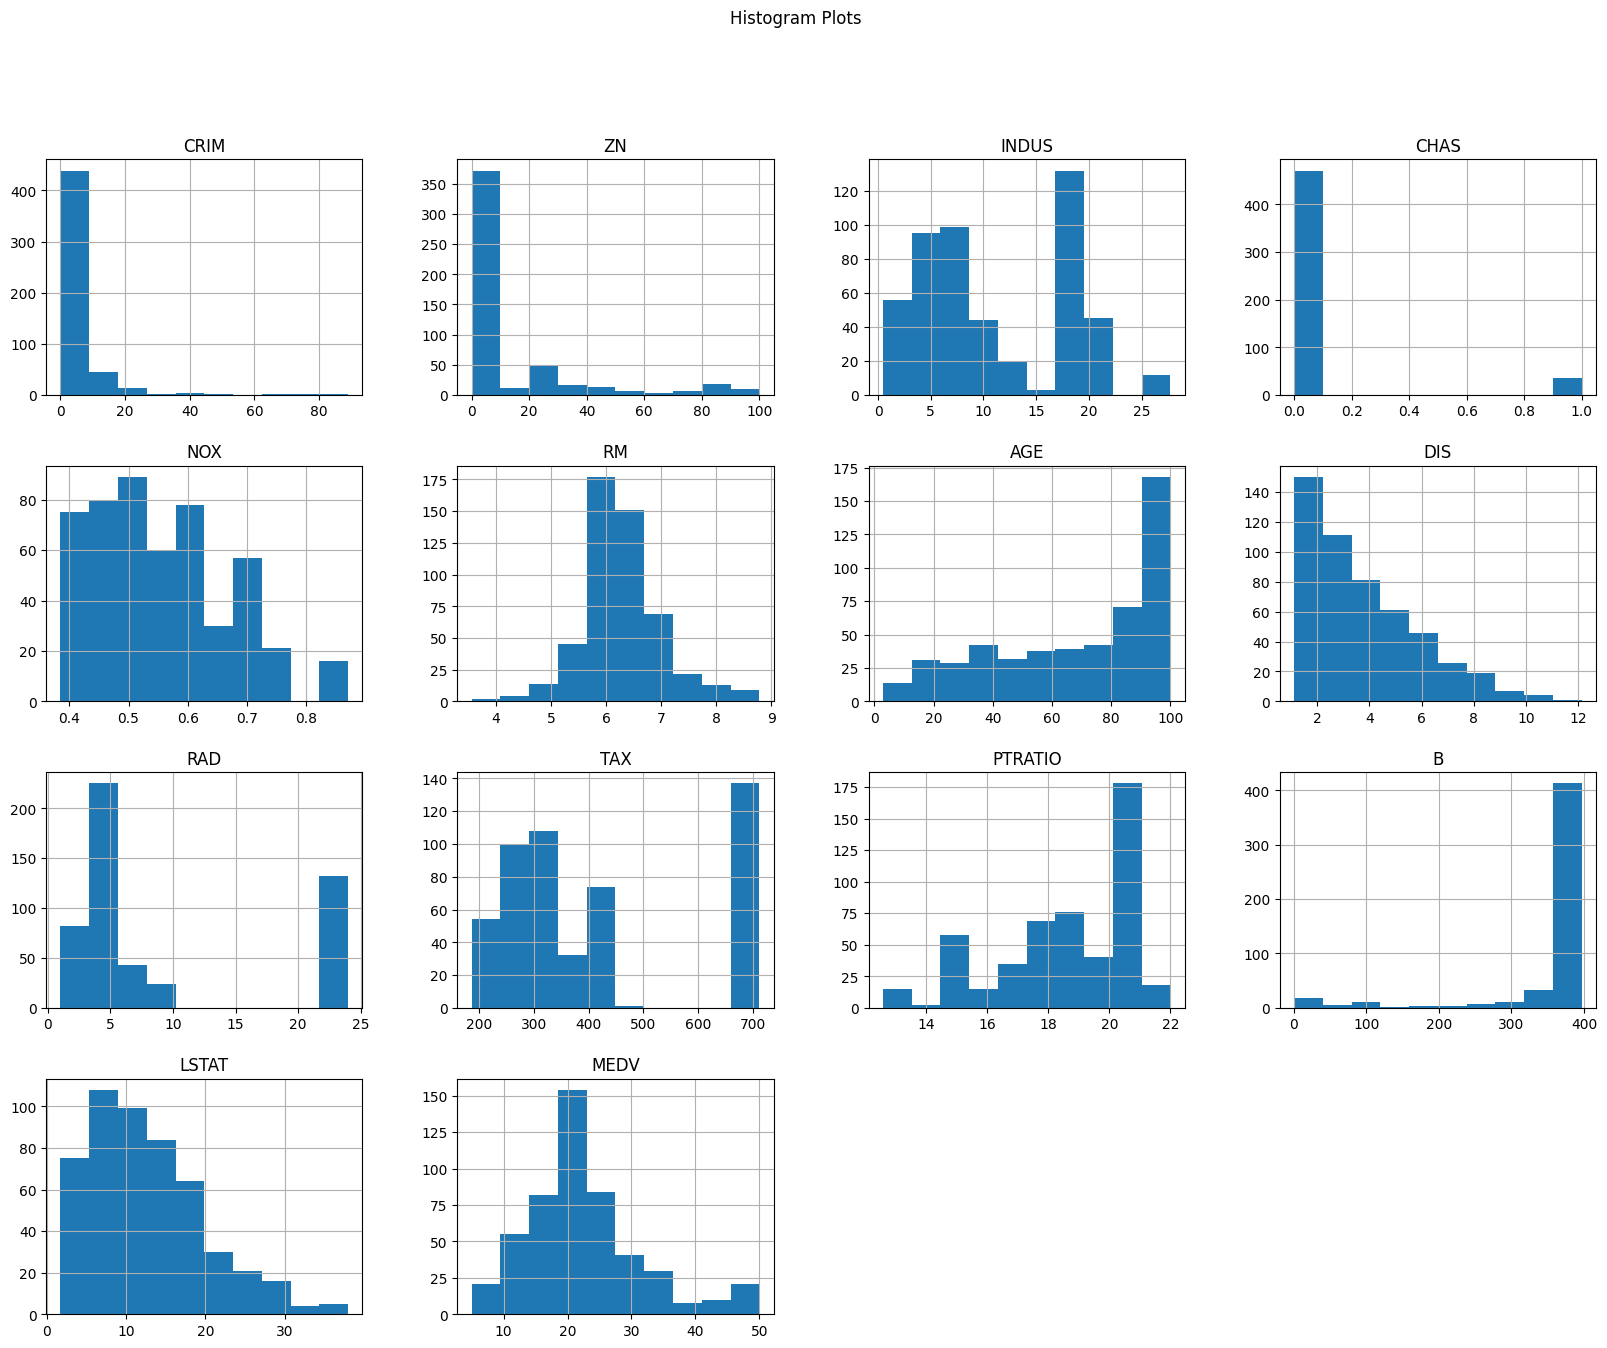

In [5]:
# Plot histograms for all numerical features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots")
plt.show()

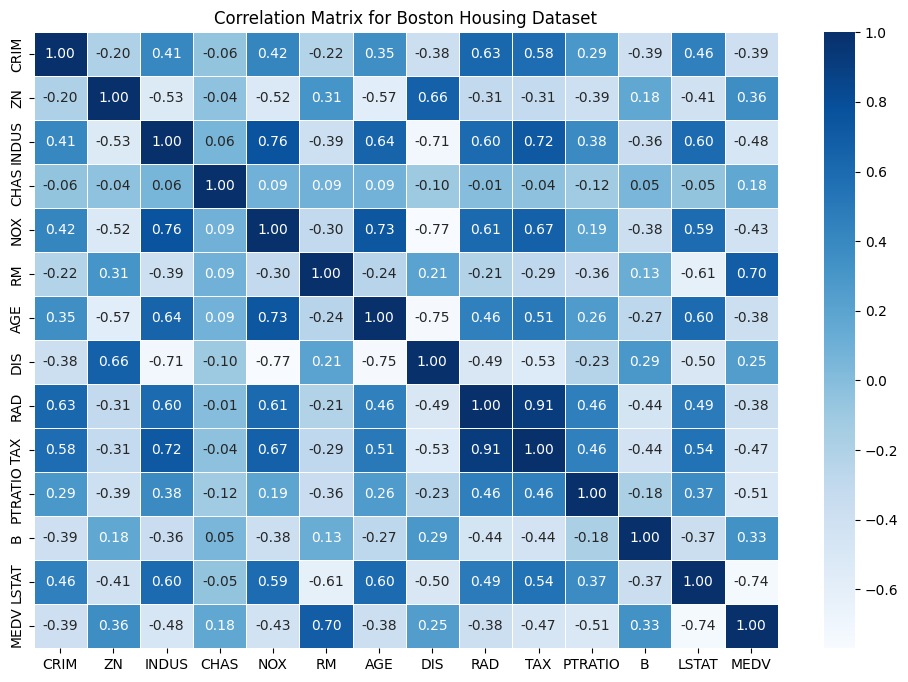

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Boston Housing Dataset")
plt.show()

# Apply Feature Scaling

In [7]:
# Drop irrelevant features based on correlation matrix
features_to_drop = ['CHAS', 'AGE', 'DIS', 'RAD', 'B', 'ZN']
df.drop(columns=features_to_drop, inplace=True)

# Verify the remaining features
print(f"Remaining features: {df.columns}")

Remaining features: Index(['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')


In [8]:
# Update feature_names to reflect the remaining columns
feature_names = df.columns.drop('MEDV')  # Exclude the target variable 'MEDV'

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform only the feature columns (excluding the target variable)
df[feature_names] = scaler.fit_transform(df[feature_names])

# Display the updated DataFrame
print(f"\nPreprocessed Dataset")
df


Preprocessed Dataset


,CRIM,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,-0.419782,-1.287909,-0.144217,0.413672,-0.666608,-1.459000,-1.075562,24.0
1,-0.417339,-0.593381,-0.740262,0.194274,-0.987329,-0.303094,-0.492439,21.6
2,-0.417342,-0.593381,-0.740262,1.282714,-0.987329,-0.303094,-1.208727,34.7
3,-0.416750,-1.306878,-0.835284,1.016303,-1.106115,0.113032,-1.361517,33.4
4,-0.412482,-1.306878,-0.835284,1.228577,-1.106115,0.113032,-1.026501,36.2
...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,-0.803212,1.176466,-0.418147,22.4
502,-0.415249,0.115738,0.158124,-0.234548,-0.803212,1.176466,-0.500850,20.6
503,-0.413447,0.115738,0.158124,0.984960,-0.803212,1.176466,-0.983048,23.9
504,-0.407764,0.115738,0.158124,0.725672,-0.803212,1.176466,-0.865302,22.0


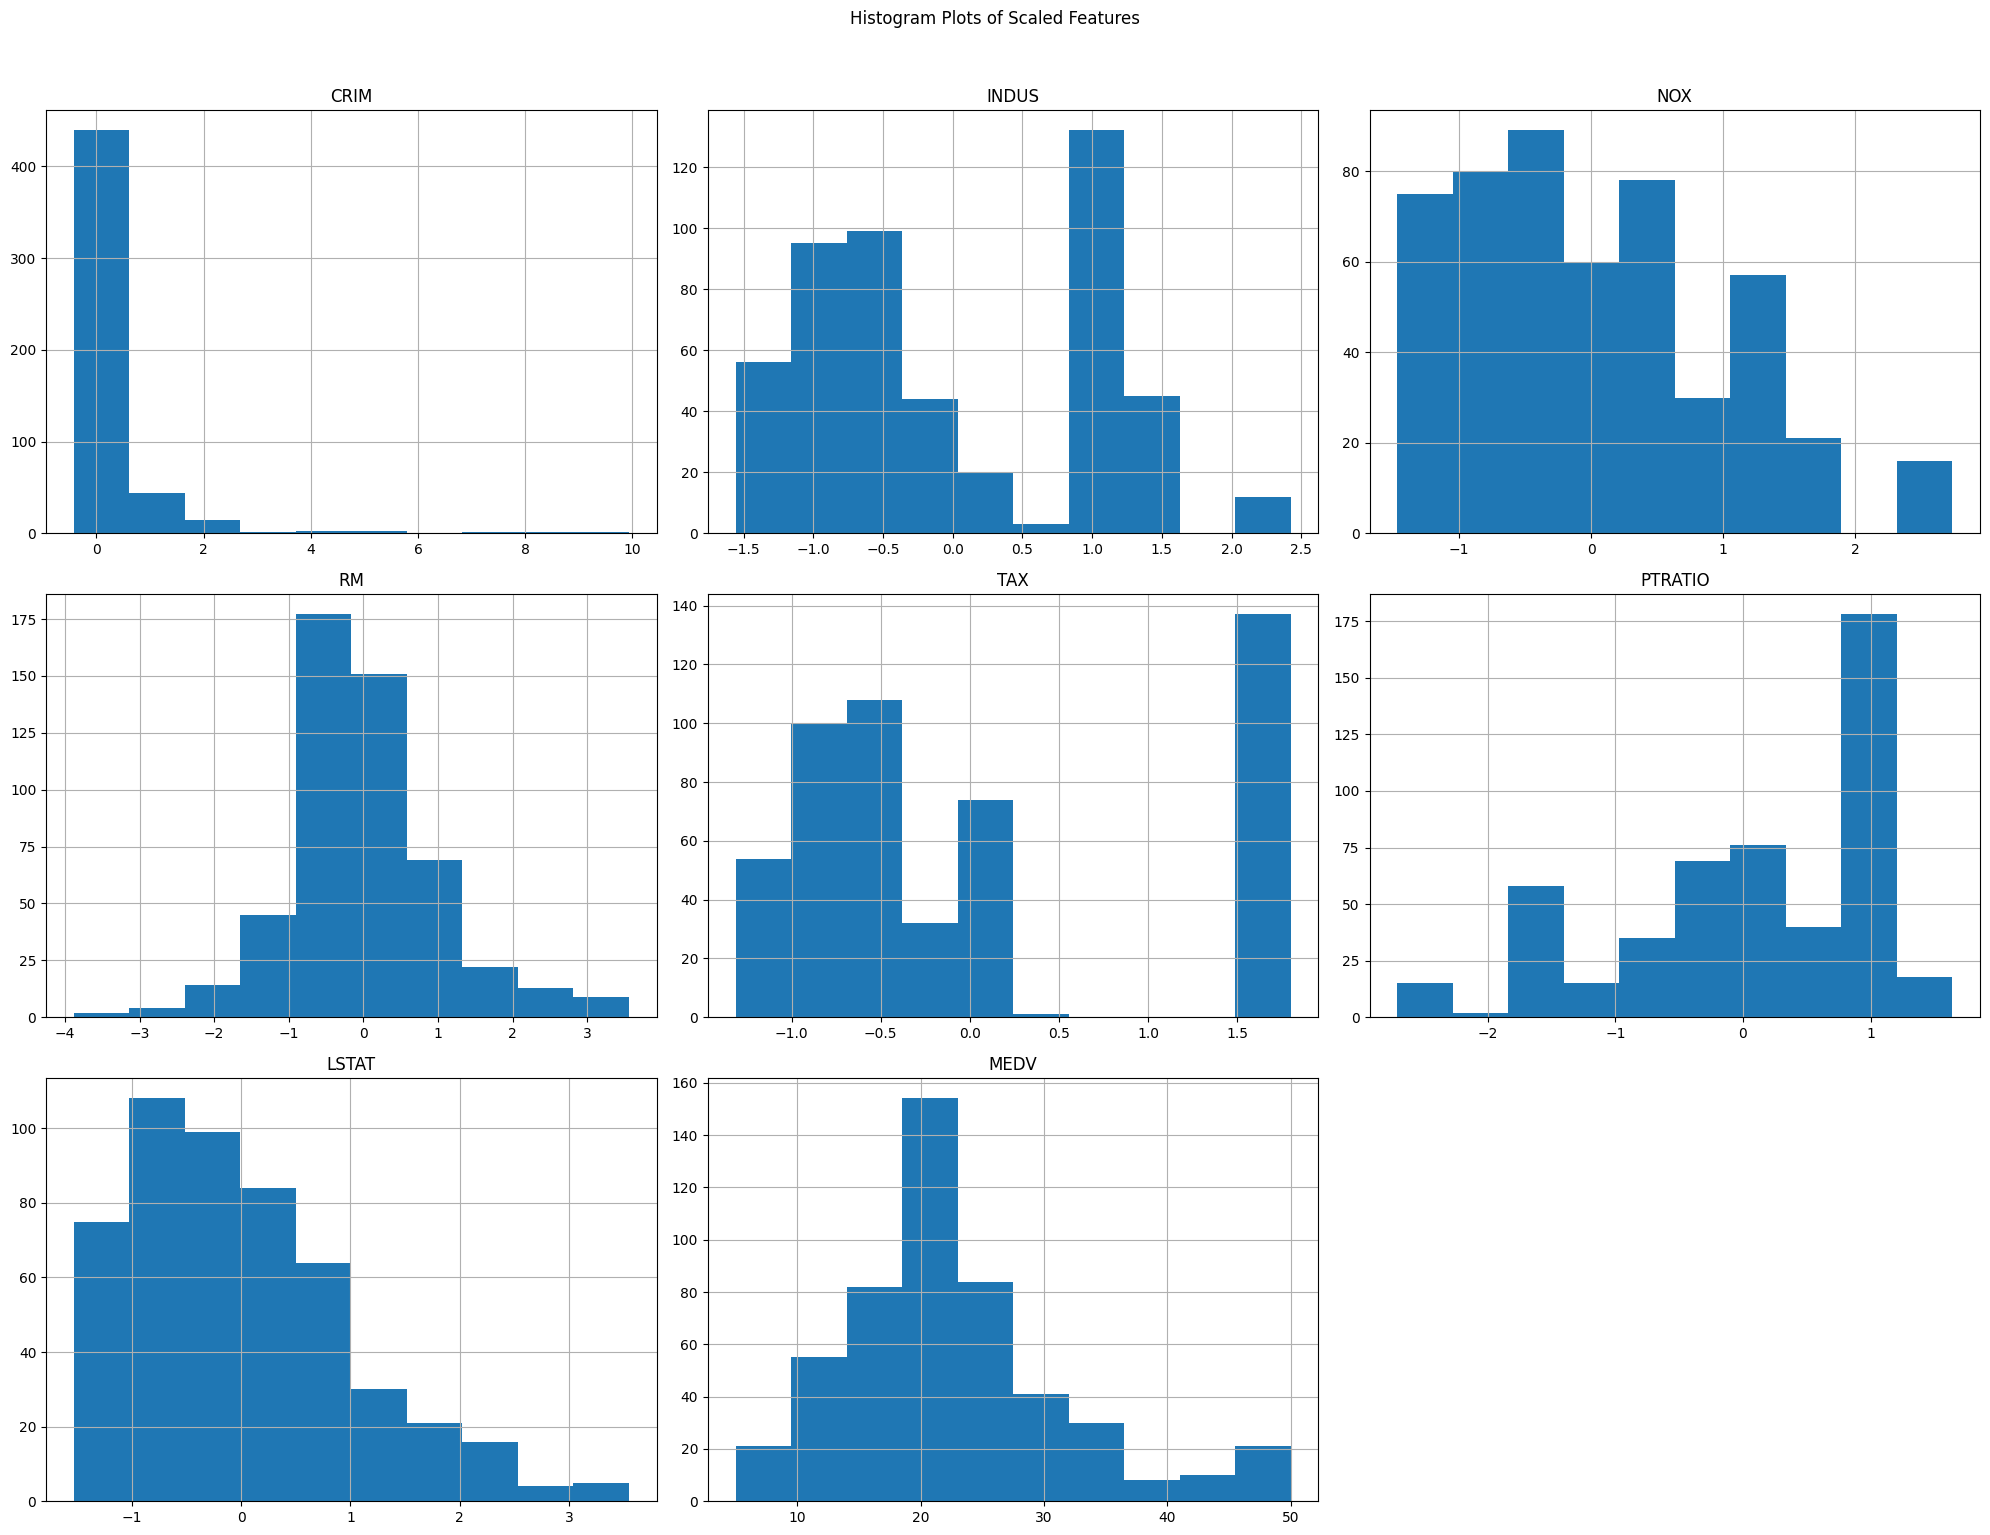

In [9]:
# Plot histograms for all scaled features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots of Scaled Features", y=1.02)
plt.tight_layout()
plt.show()

# Train and Evaluate Regression Models

## Spliting the Data into Training and Testing Sets

In [10]:
# Features (X) and target (y)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Linear Regression

In [11]:
# Initialize and train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set 
y_pred_lr = model.predict(X_test)

# Evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display metrics for Linear Regression
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared: {r2_lr}")

Mean Squared Error: 26.534410697836496
Mean Absolute Error: 3.6080352551672346
R-squared: 0.643896009209968


## Train Decision Tree

In [12]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display metrics for Decision Tree
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

Mean Squared Error: 22.735328947368423
Mean Absolute Error: 3.0822368421052633
R-squared: 0.6948814329333435


## Random Forest

In [13]:
# Initialize and train the Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display results for Random Forest
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 10.889793059210538
Mean Absolute Error: 2.154414473684212
R-squared: 0.853853970550827


## Support Vector Machine  

In [14]:
# Initialize the SVM model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Display results for SVM
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")

Mean Squared Error: 21.85391088863724
Mean Absolute Error: 2.8657351252220367
R-squared: 0.7067104685144566


## Compare performance

In [15]:
# Create a dictionary with the model names and evaluation metrics
model_metrics = {
    "Model": ["Random Forest", "Decision Tree", "Support Vector Machine", "Linear Regression"],
    "R² Score": [r2_rf, r2_dt, r2_svr, r2_lr],
    "MSE": [mse_rf, mse_dt, mse_svr, mse_lr],
    "MAE": [mae_rf, mae_dt, mae_svr, mae_lr]
}

# Create a DataFrame from the dictionary
comparison_df = pd.DataFrame(model_metrics)

# Sort by R² Score (descending) and round metrics
comparison_df = comparison_df.sort_values(by="R² Score", ascending=False)

# Display the comparison table with proper formatting
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))


Model Performance Comparison:
                 Model  R² Score       MSE      MAE
         Random Forest  0.853854 10.889793 2.154414
Support Vector Machine  0.706710 21.853911 2.865735
         Decision Tree  0.694881 22.735329 3.082237
     Linear Regression  0.643896 26.534411 3.608035


# Tune hyperparameters using GridSearchCV and RandomizedSearchCV

## Optimize regularization strength of Linear Regression

In [16]:
# Hyperparameters for Ridge and Lasso regression
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}  # Regularization strength

# Ridge(L2) model
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)
print(f"Best parameters for Ridge Regression: {grid_search_ridge.best_params_}")

# Lasso(L1) model
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_search_lasso.fit(X_train, y_train)
print(f"Best parameters for Lasso Regression: {grid_search_lasso.best_params_}")

Best parameters for Ridge Regression: {'alpha': 10}
Best parameters for Lasso Regression: {'alpha': 0.1}


## Hypertuning Decision Tree

In [17]:
# Hyperparameters to tune for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error']
}

# Decision Tree model
dt = DecisionTreeRegressor()
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best parameters for Decision Tree: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Hypertuning Random Forest

In [18]:
# Hyperparameters for RandomizedSearchCV for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error']
}

# Random Forest with RandomizedSearchCV
rf = RandomForestRegressor()
random_search_rf = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest (RandomizedSearchCV): {random_search_rf.best_params_}")

Best parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'absolute_error'}


## Hypertuning Support Vector Machine

In [19]:
# Hyperparameters for RandomizedSearchCV for Support Vector Machine
param_dist_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Support Vector Machine with RandomizedSearchCV
svr = SVR()
random_search_svr = RandomizedSearchCV(svr, param_dist_svr, n_iter=10, cv=5, random_state=42)
random_search_svr.fit(X_train, y_train)
print(f"Best parameters for SVR (RandomizedSearchCV): {random_search_svr.best_params_}")

Best parameters for SVR (RandomizedSearchCV): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
